For this project, I will use the Eigenface algorithm to reconstruct images by utilizing the high correlation between face images and taking the high-dimensional data and represent this data in lower dimensional spaces.

### Retrieve and Prep "Labeled Faces in the Wild" Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

%matplotlib inline

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.5) # at least 20 face per person, resize images by half
n_samples, height, width = lfw_people.images.shape # assign number of images; height, and width of images

# Split data into X and y for train / test split
X = lfw_people.data
y = lfw_people.target

# create list of the target names
target_names = lfw_people.target_names

# assign to variables: number of unique names and number of total features
n_classes = target_names.shape[0]
n_features = X.shape[1]

print("Total dataset size:")
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))

Total dataset size:
n_samples: 3023
n_features: 2914
n_classes: 62


Let's split the data set into two parts: training and test set. We will use 20% of dataset for testing.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1220)

### Let's See the First Three Images of Train Set

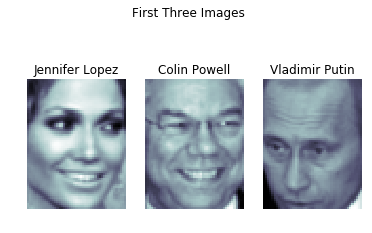

In [4]:
f, axarr = plt.subplots(1,3)

f.suptitle('First Three Images')

axarr[0].imshow(X_train[0,:].reshape(height,width), cmap=plt.cm.bone,)
axarr[0].set_title(target_names[y_train[0]])
axarr[0].axis('off')

axarr[1].imshow(X_train[1,:].reshape(height,width), cmap=plt.cm.bone)
axarr[1].set_title(target_names[y_train[1]])
axarr[1].axis('off')

axarr[2].imshow(X_train[2,:].reshape(height,width), cmap=plt.cm.bone)
axarr[2].set_title(target_names[y_train[2]])
axarr[2].axis('off');


## Perform Principal Component Analysis
> Center each image in the data set by computing the mean of the input data points and subtracting the mean from all of the data points. 

In [5]:
pca = PCA(whiten=True)

In [6]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

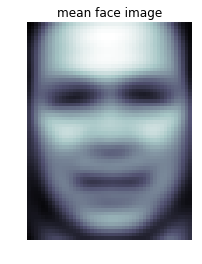

In [7]:
# assign the mean image to variable `x_mean`
x_mean = pca.mean_


def display_face(x, height, width, name):
    
    """
    Displays an image with given parameters. 
    
    Parameters 
    -------------------
    x: image vector, 1d NumPy array
    height, width: height and width ints of images
    name: image title, string
    """
    
    plt.imshow(x.reshape(height, width), cmap=plt.cm.bone)
    plt.axis('off') # removed axes' ticks and labels from figure
    plt.title(name)
    plt.show();

# display the mean image of all data
display_face(x_mean, height, width, 'mean face image')

## Perform PCA with SVD On the Centered Dataset

The original PCA performs the eigenvalue decomposition on the **covariance matrix** $X^\intercal X$, which is given by 

## $$X^\intercal X = U\Lambda U^\intercal\,,$$

where each column of $U$ is an eigenvector. They are **orthonormal**, which means
## $$
\langle\mathbf{u}_i, \mathbf{u}_j\rangle = \mathbf{u}_i^\intercal \mathbf{u}_j = 0\,\quad\text{ for }\forall i\neq j \quad \text{ and } \quad \|\mathbf{u}_i\|_2 = 1\,\text{ for }i=1,2,\ldots, p\,,
$$

where $\mathbf{u}_i$ is the $i^{\mathrm{th}}$ column vector of $U$.

Suppose we have an SVD of $X$:

## $$
X = U\Sigma V^\intercal
$$

Then we see that 

## $$
\begin{aligned}
X^\intercal X 
&= V\Sigma^\intercal U^\intercal U\Sigma V^\intercal \\
&= V\Sigma^2 V^\intercal\,,
\end{aligned}
$$

Hence, $V$ contains the eigenvectors of $X^\intercal X$.</span>

In [ ]:
X_centered = np.array(X_train) - x_mean

def compute_SVD(X_centered):
    """
    Performs SVD - return singular values and eigenvectors.
    
    Returns:
    S: 1D NumPy array of singular values
    V: eigenvectors, 2D NumPy array
    """
    
    _, S, V = np.linalg.svd(X_centered)
    
    return S, V

S, V = compute_SVD(X_centered)

### Display First 5 Eigenvectors

In [ ]:
f, axarr = plt.subplots(5,1, figsize=(16,25))

axarr[0].imshow(V[0,:].reshape(height,width), cmap=plt.cm.bone)
axarr[0].set_title('1st Eigenvector')
axarr[0].axis('off')

axarr[1].imshow(V[1,:].reshape(height,width), cmap=plt.cm.bone)
axarr[1].set_title('2nd Eigenvector')
axarr[1].axis('off')

axarr[2].imshow(V[2,:].reshape(height,width), cmap=plt.cm.bone)
axarr[2].set_title('3rd Eigenvector')
axarr[2].axis('off')

axarr[3].imshow(V[3,:].reshape(height,width), cmap=plt.cm.bone)
axarr[3].set_title('4th Eigenvector')
axarr[3].axis('off')

axarr[4].imshow(V[4,:].reshape(height,width), cmap=plt.cm.bone)
axarr[4].set_title('5th Eigenvector')
axarr[4].axis('off');

### Draw the Scree Plot
> The scree plot shows the explained variance ratio against the number of chosen eigenvectors.

In [ ]:
# normalize the singular values
S_norm = normalize(S.reshape(1,-1), 'l1')
np.sum(S_norm)

In [ ]:
# calculate cumulative sum of all normalized S scalar values from SVD operation
cumulative_sum = np.cumsum(np.round(S_norm, decimals=4))

In [ ]:
# plot cumulative sum where k <= 1000
plt.plot(cumulative_sum[:1000], label='cumulative')

# line that shows how the (normalized) singular value 
# changes as you increase the numer of PCs $k$.
plt.plot(S_norm[0][:1000], label='singular value') 

plt.xlabel('Number of PCs (k)')
plt.ylabel('Explained Variance Ratio')

plt.legend(loc=2)
plt.show();

Now we will project a couple of images onto the low dimensional subspace spanned by the top $k$ eigenvectors. Let 

### $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ 

be the original image and 

### $\mathbf{v}_1$, $\mathbf{v}_2$, $\ldots$, $\mathbf{v}_n$ 

denote eigenvectors. The coordinate values of 

### $\mathbf{x}$ 

in the projected space is obtained by computing the inner products between 

### $\mathbf{x}$ and $\mathbf{v}_i$ 

The first coordinate value for the first dimension is given by 

### $<\mathbf{x}, \mathbf{v}_1> = \mathbf{v}_1^\intercal\mathbf{x}$


In [ ]:
# Function that finds coordinate to eventually reconstruct images using Eigenvectors

def get_projected_coordinate(X_centered, V, n_eigv):
    """
    Return coordinate values of a given data point in the projected space.
    
    Parameters
    ---------------
    X_centered : the "centered" image from original data set; 1D nunmpy array of lenght 2914
    V : set of all eigenvectors from the data set, generated by SVD
    n_eigv: # of Eigenvectors to use
    
    
    Return 
    ------------------
    coord: 1D NumPy array, should be the length of `n_eigv`
    """
    coord = np.array(np.dot(V[:n_eigv,:], # perform matrix operation as denoted in formula above
                            X_centered))
   
    return coord

Given the coordinate values in the projected space, the original image can be reconstructed using the top $k$ eigenvectors and the mean images:

### $$\hat{\mathbf{x}} = \bar{\mathbf{x}} + \alpha_1\mathbf{v}_1 + \alpha_2\mathbf{v}_2 + \cdots + \alpha_k\mathbf{v}_k\,,
$$

where $\alpha_i$s are coordinate values and $\bar{\mathbf{x}}$ is the mean of images.



In [ ]:
def reconstruct_image(x_mean, V, coord):
    """
    Function that computes the reconstructed image in the 
    projected space and Eigenvectors.
    
    Parameters
    ----------------------
    x_mean: the mean image
    V: the set of eigenvectors
    coord: coordinate values in the projected space, 1D numpy array
    """
    total = 0
    for i in range(len(coord)):
        total += coord[i]*V[i,:]
    
    recon = x_mean + total
    
    return recon

## Reconstruct First Image In Training Set using the top 100 Eigenvectors


In [ ]:
coord_100 = get_projected_coordinate(X_centered[0], V, 100)

recon_100 = reconstruct_image(x_mean, V, coord_100)

f, axarr = plt.subplots(1,2, figsize=(9,16))

axarr[0].imshow(recon_100.reshape(height,width), cmap=plt.cm.bone)
axarr[0].set_title('Reconstructed With 100 Eigenvectors')
axarr[0].axis('off')

axarr[1].imshow(X_centered[0].reshape(height,width), cmap=plt.cm.bone)
axarr[1].set_title('Original')
axarr[1].axis('off');

### Now with 1000 Eigenvectors

In [ ]:

coord_1000 = get_projected_coordinate(X_centered[0], V, 1000)

recon_1000 = reconstruct_image(x_mean, V, coord_1000)

f, axarr = plt.subplots(1,2, figsize=(9,16))

axarr[0].imshow(recon_1000.reshape(height,width), cmap=plt.cm.bone)
axarr[0].set_title('Reconstructed With 1000 Eigenvectors')
axarr[0].axis('off')

axarr[1].imshow(X_centered[0].reshape(height,width), cmap=plt.cm.bone)
axarr[1].set_title('Original')
axarr[1].axis('off');
